# Chapter 3: Classification

In this chapter the code will deal with classification techniques in ML.

## MNIST

We will start off by using the MNIST dataset which is a combination of handwritten digits written by high school students and US Postal Service. This problem tries to recognize the handwritten digits.

### Get the data 

We will use sklearn's `fetch_mldata` function to get the MNIST dataset. All of sklearn's datasets have a dictionary containing the following things.
- Descr -- Description of the data
- data -- The actual data
- target -- The target variable


In [4]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata("MNIST Original")
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [5]:
X, y = mnist["data"], mnist["target"]

In [6]:
X.shape, y.shape

((70000, 784), (70000,))

### Plotting the digits

In this section we will try and plot a few of the digits to see what they actually look. The data is greyscale so it should be a black-white picture

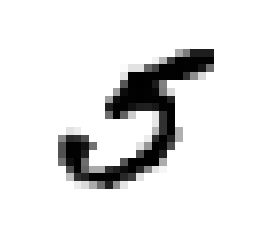

In [7]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()

### Train Test split

The MNIST dataset is already split into training and testing. The first 60k are training data and the last 10k are testing data. We will get the train and test splits and also shuffle the training data so that our CV folds find all of the digits in each of the fold.

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[]